<a href="https://colab.research.google.com/github/Sajeenafiza/ML-Disease-prediction-/blob/main/ML_Case_Study_Disease_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Disease prediction using machine learning techniques***- Supervised Classification

Project Type - Disease prediction using machine learning techniques

Contribution - Individual

Submitted by - Sajeena T R

# **1. Problem Statement**

This case study is focused in the field of Data Science with application to the area of disease prediction. The aim is to develop a predictive model to determine the risk of stroke in individuals based on their demographic, lifestyle, and health-related factors.The main objective is to accurately classify individuals into two groups: those at high risk of stroke and those at low risk, using available data features.

Stroke often leads to disability and mortality. Therefore, the development of effective prediction models holds paramount importance in mitigating the impact of strokes by enabling timely interventions and preventive measures.

By analyzing diverse data sources encompassing demographic details, lifestyle factors and medical history the objective is to accurately classify individuals into distinct risk categories, namely those at elevated risk of experiencing a stroke and those with lower risk profiles.

# **2. Data collection**

Stroke Prediction  Dataset is extracted from the Kaggle to carry out this assignment.The dataset includes various features related to patients' health and lifestyle, including age, hypertension, heart disease, marital status, work type, residence type, average glucose level, BMI, smoking status, and gender. The dataset also includes a target variable 'stroke' representing the occurrence of a stroke.Each entry represents a unique patient, and the features capture various risk factors associated with stroke.

 The dataset consists of 5110 data points stored as rows with 12 features in columns:

**The following feature information is derived from the machine learning repository itself.**


1.age: This is the age of the patient.

2.hypertension: This is a binary feature indicating whether the patient has hypertension (high blood pressure) or not.

3.heart_disease: This binary feature indicates whether the patient has heart disease or not.

4.ever_married: This feature represents whether the patient is married or not.

5.work_type: This categorical feature describes the type of occupation of the patient.

6.Residence_type: This feature indicates whether the patient lives in a rural or urban area.

7.avg_glucose_level: This feature represents the average glucose level in the patient's blood.

8.bmi: This is the Body Mass Index of the patient, calculated as weight in kilograms divided by the square of height in meters.

9.smoking_status: This categorical feature indicates whether the patient is a smoker, former smoker, or never smoked.

10.gender: This feature represents the gender of the patient.


# **3. Data preprocessing**

Some preprocessing techniques are applied to prepare the data.

In [ ]:
# Importing all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc,accuracy_score,ConfusionMatrixDisplay,make_scorer, roc_auc_score

In [ ]:
# Loading the data

data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# rows and columns of the dataset
data.shape

(5110, 12)

In [ ]:
# displaying the data types and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

In [ ]:
# Checking the null values in the features

data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

No duplicate values are present in the dataset.As we can see, missing values are identified only in column bmi. We will use imputation techniques according to the characteristics of the features.Let's create a copy before imputing any data and we will drop the id column as it is not adding any value to our analysis.

In [ ]:
# Creating a copy
df = data.copy()

In [ ]:
# dropping the id column
df.drop(columns='id', inplace=True)

In [ ]:
# id column dropped
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


###Handling  missing values

<ipython-input-10-be8380161d34>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'], fit=st.norm)


((array([-3.6412931, -3.4063133, -3.2768215, ...,  3.2768215,  3.4063133,
          3.6412931]),
  array([10.3, 11.3, 11.5, ...,  nan,  nan,  nan])),
 (nan, nan, nan))

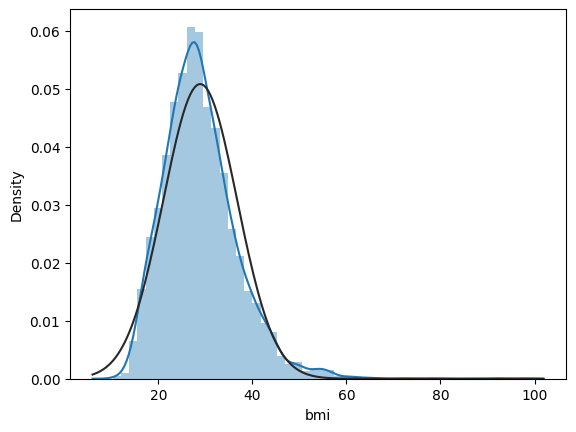

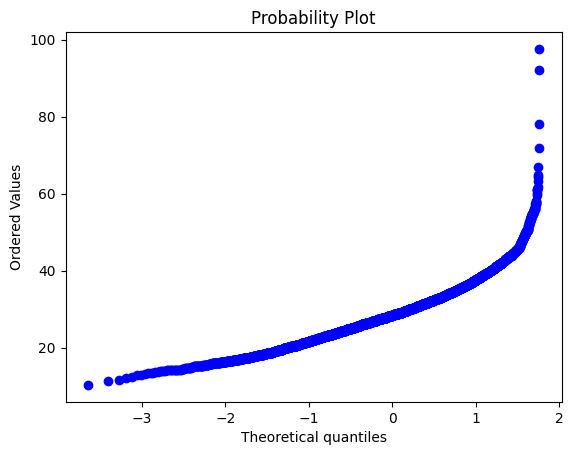

In [ ]:
# Checking the distribution before  imputation
sns.distplot(df['bmi'], fit=st.norm)
fig = plt.figure()
st.probplot(df['bmi'], plot=plt)

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


As we can wee, there is a huge difference between max value and third quartile.Also from the above prob plot we can see some outliers. So we can impute the missing values with median.

In [ ]:
# median of the bmi column
med_bmi=df['bmi'].median()

In [ ]:
# imputing with median
df['bmi']=df['bmi'].fillna(med_bmi)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


As we can see, all the null values are removed.

###Handling outliers

In [ ]:
# summary statistics
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


From the above summary statistics, we can conclude some outlier presence in the columns age,avg_glucose_level and bmi, as there is a huge difference between max value and third quartile.

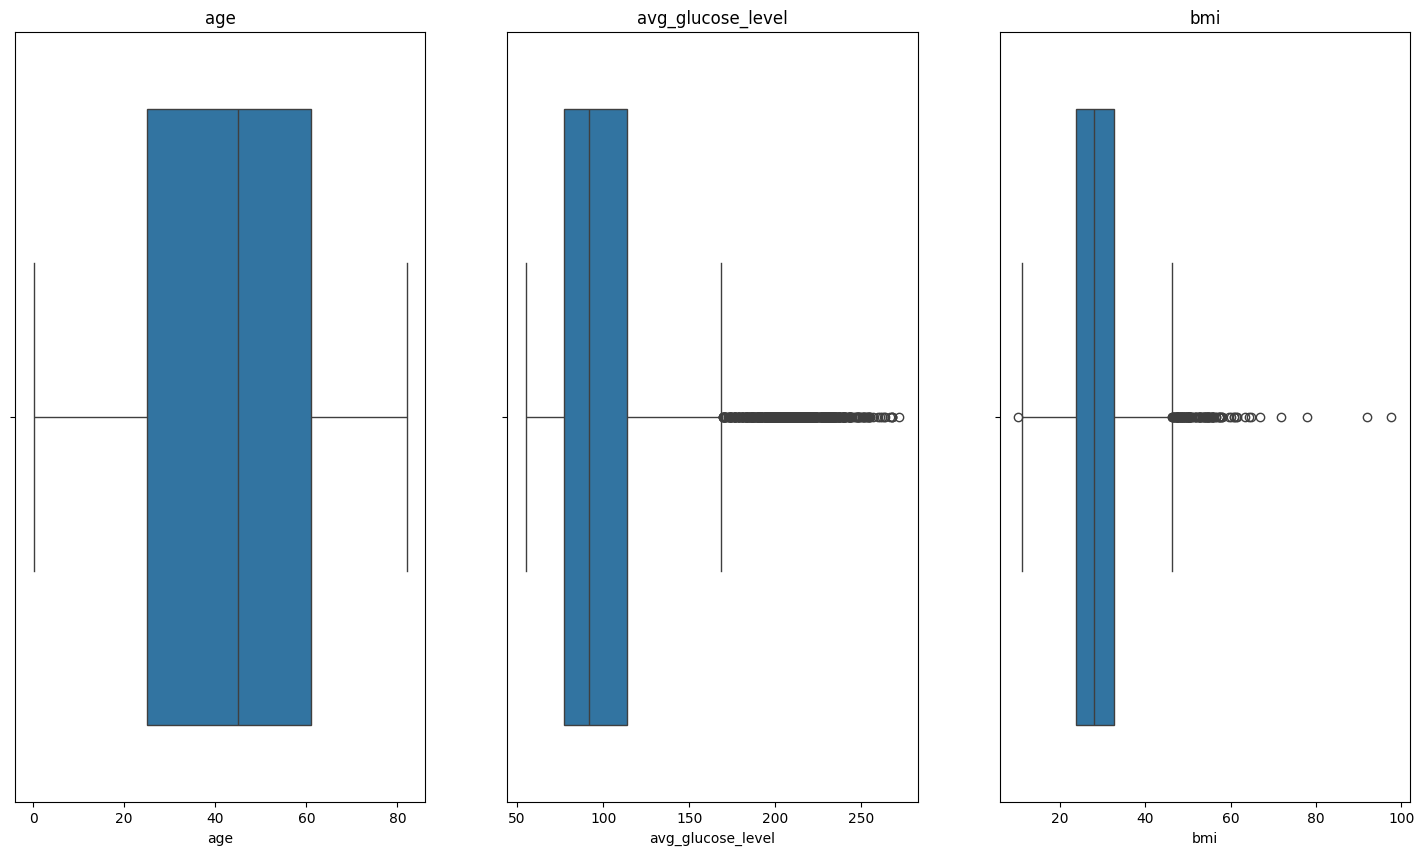

In [ ]:
# plotting the outliers using boxplot

# storing 3 columns in one list named features
features=['age','avg_glucose_level','bmi']

# plotting the subplots
fig,axs=plt.subplots(1,3,figsize=(18,10))

# iterating throgh the features list
for i,fet in enumerate(features):
  sns.boxplot(ax=axs[i],data=df,x=fet)  # boxplot
for i,fet in enumerate(features):
  axs[i].set_title(fet)     #separate titles for 3 graphs
plt.show()

In [ ]:
# defining a function for detecting the outliers and to take the count

# finding the outlier using the IQR method
def detect_outlier(col):
  q1=df[col].quantile(0.25)   #defining q1
  q3=df[col].quantile(0.75)   #defining q3
  iqr=q3-q1                   #finding IQR
  l_bound=q1-1.5*iqr          #defining the lower bound
  u_bound=q3+1.5*iqr          #defining the upper bound
  return ((df[col]<l_bound) |(df[col]>u_bound)).sum()    #count of outliers outside the lower bound and upper bound

col=['age','avg_glucose_level','bmi']

# iterating the columns list
for out in col:
  print("The number of outliers in the column,",out,detect_outlier(out))

The number of outliers in the column, age 0
The number of outliers in the column, avg_glucose_level 627
The number of outliers in the column, bmi 126


The column age contains no outliers.The columns avg_glucose_level contains 627 and bmi contains 126 outliers.

As the number of outliers are large, we cannot remove them.So we can apply log transformation to reduce the outliers.Before applying log transformation we have to check the columns for negative value or zero.

In [ ]:
# checking for zero or negative values in the bmi column
(df['bmi']<=0).sum()

0

In [ ]:
# checking for zero or negative values in the avg_glucose_level column
(df['avg_glucose_level']<=0).sum()

0

In [ ]:
# defining a function for applying log transformation for both the columns
def reduce_out(col):
  df[col]=np.log(df[col])
col=['avg_glucose_level','bmi']
for out in col:
  reduce_out(col)
  print("The number of outliers in the column,",out,detect_outlier(out))

The number of outliers in the column, avg_glucose_level 380
The number of outliers in the column, bmi 91


After the log transformation, the outliers reduced to 380 and 91 for avg_glucose_level and bmi.

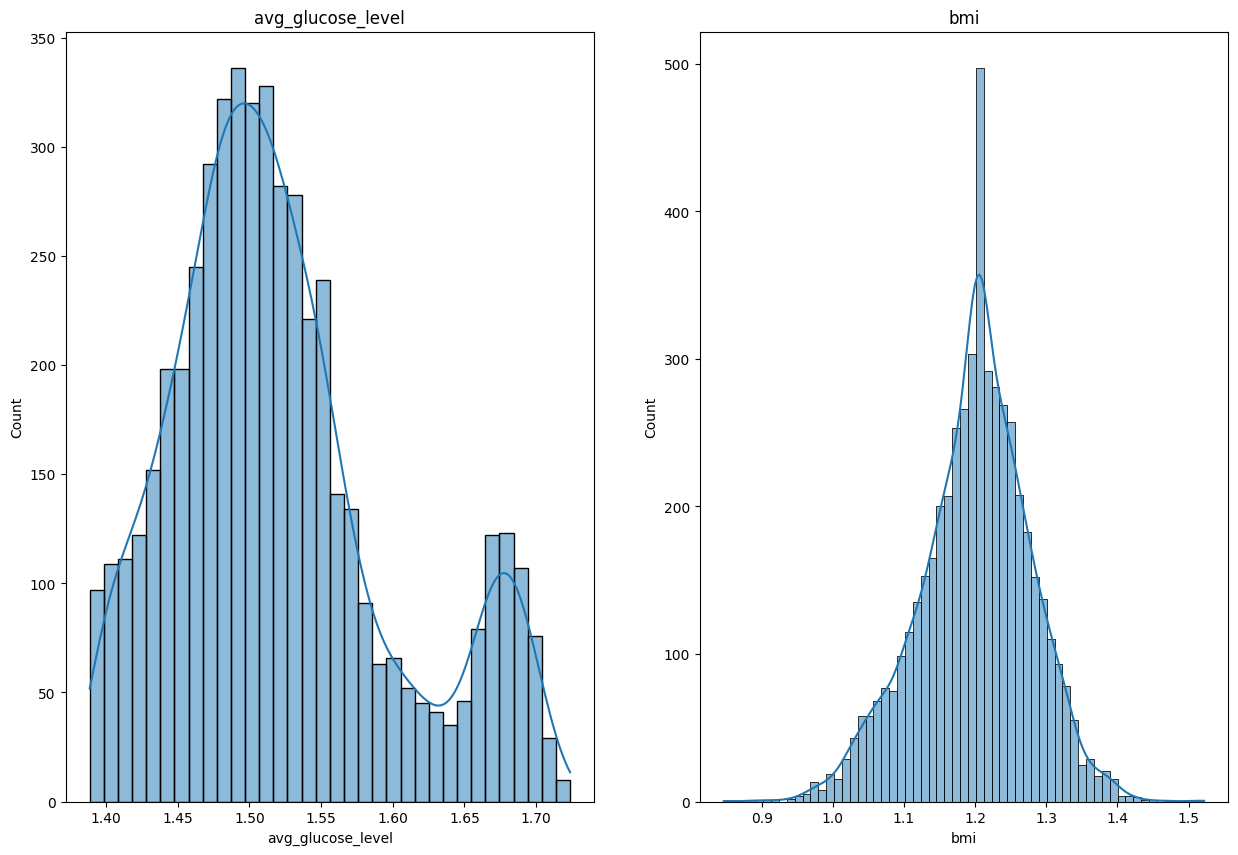

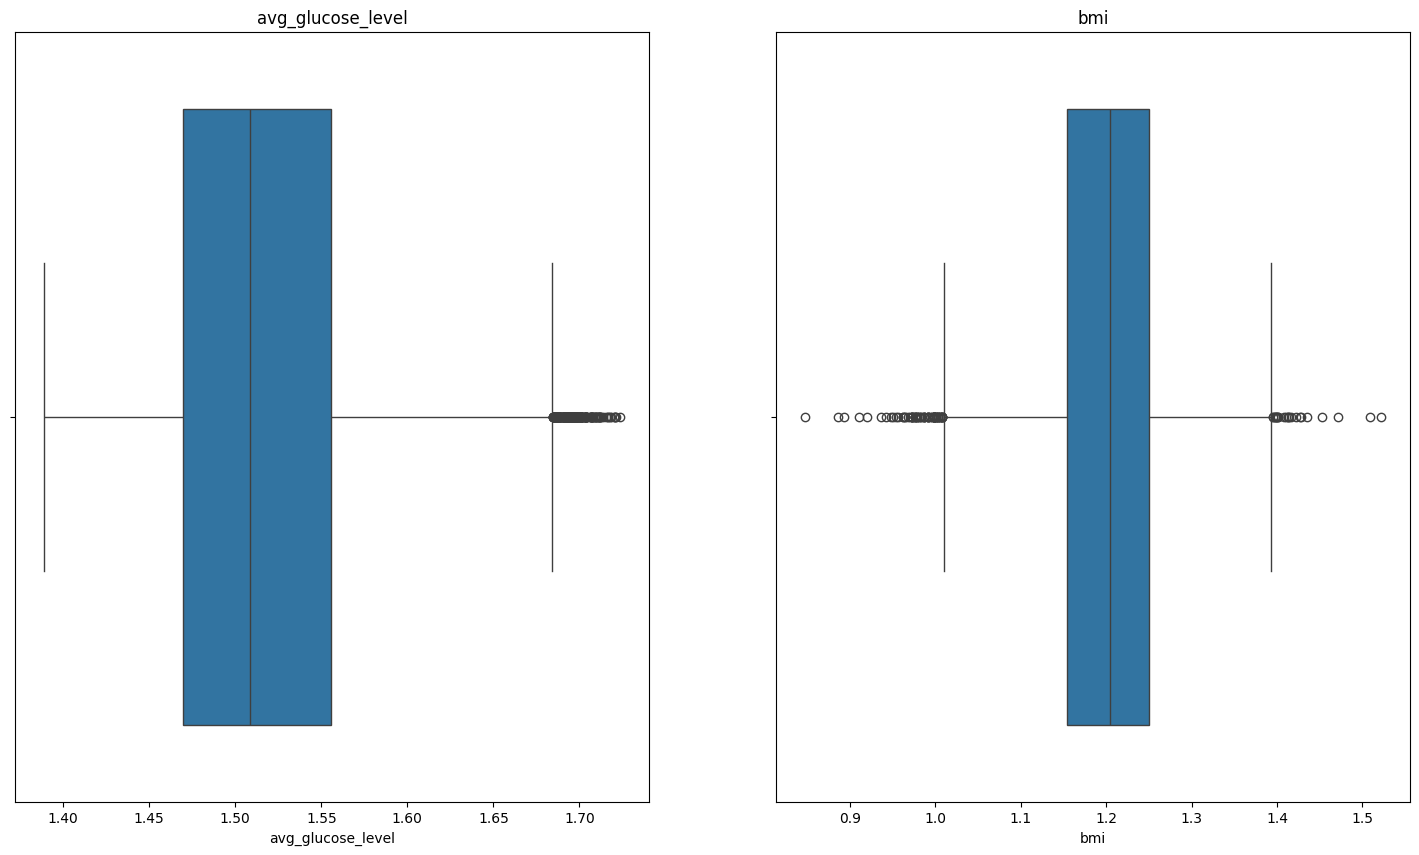

In [ ]:
# plotting the histogram

features=['avg_glucose_level','bmi']
fig,axs=plt.subplots(1,2,figsize=(15,10))
for i,fet in zip(features,axs.flatten()):
  sns.histplot(data=df[i],kde=True,ax=fet)
for i,fet in enumerate(features):
  axs[i].set_title(fet)
plt.show()


# plotting the boxplot
features=['avg_glucose_level','bmi']
fig,axs=plt.subplots(1,2,figsize=(18,10))
for i,fet in enumerate(features):
  sns.boxplot(ax=axs[i],data=df,x=fet)
for i,fet in enumerate(features):
  axs[i].set_title(fet)
plt.show()

###Categorical Encoding and feature scaling

In [ ]:
# checking the categorical variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
# displaying the unique values for the categorical variables
categor_var=['gender','ever_married','work_type','Residence_type','smoking_status']
for cat in categor_var:
   print("The unique values in",cat,df[cat].unique())


The unique values in gender ['Male' 'Female' 'Other']
The unique values in ever_married ['Yes' 'No']
The unique values in work_type ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
The unique values in Residence_type ['Urban' 'Rural']
The unique values in smoking_status ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


'Other' gender category and 'Unknown' smoking_status category need to be handled.

In [ ]:
# checking the count of 'Other' category
(df['gender']=='Other').sum()

1

In [ ]:
# checking the count of 'Unknown' category
(df['smoking_status']=='Unknown').sum()

1544

There is only one instance with 'Other' gender category and 1544 instances with 'Unknown' smoking_status category.

In [ ]:
# finding the most frequent gender category
frequent_gen=df['gender'].value_counts().idxmax()

In [ ]:
# replacing the 'Other' with most frequent gender
df['gender']=df['gender'].replace('Other',frequent_gen)
(df['gender']=='Other').sum()

0

In [ ]:
# Replace 'Unknown' with a new category 'Missing'
df['smoking_status'].replace('Unknown', 'Missing', inplace=True)

Since there is only one instance with 'Other' gender category, it is replaced with most frequent gender and 'Unknown' smoking_status category is replaced with 'Missing' value.

In [ ]:
# checking for the unique values for the numerical variables
numer_var=['hypertension',	'heart_disease','stroke']
for nu in numer_var:
   print("The unique values in",nu,df[nu].unique())

The unique values in hypertension [0 1]
The unique values in heart_disease [1 0]
The unique values in stroke [1 0]


The numerical variables column contains [1,0] values.

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,1.692375,1.280947,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,1.669461,1.204703,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,1.539591,1.247389,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,1.637638,1.263578,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,1.640887,1.156269,never smoked,1


In [ ]:
categor_var=['gender','ever_married','work_type','Residence_type','smoking_status']
cat_df=df[categor_var]
encoder=OneHotEncoder()
df_encode=encoder.fit_transform(cat_df)
df_encoded=df_encode.toarray()
encoded_df=pd.DataFrame(df_encoded,columns=encoder.get_feature_names_out(categor_var))
df_new=df.drop(categor_var,axis=1)
df_en = pd.concat([df_new, encoded_df], axis=1)
df_en

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Missing,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1.692375,1.280947,1,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0,0,1.669461,1.204703,1,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0,1,1.539591,1.247389,1,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0,0,1.637638,1.263578,1,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1,0,1.640887,1.156269,1,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1.487911,1.204703,0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5106,81.0,0,0,1.574828,1.305323,0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,35.0,0,0,1.485850,1.229933,0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,51.0,0,0,1.631930,1.176373,0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# **4. Exploratory Data Analysis (EDA)**

###Univariate Analysis

###Distribution of target variable 'stroke'

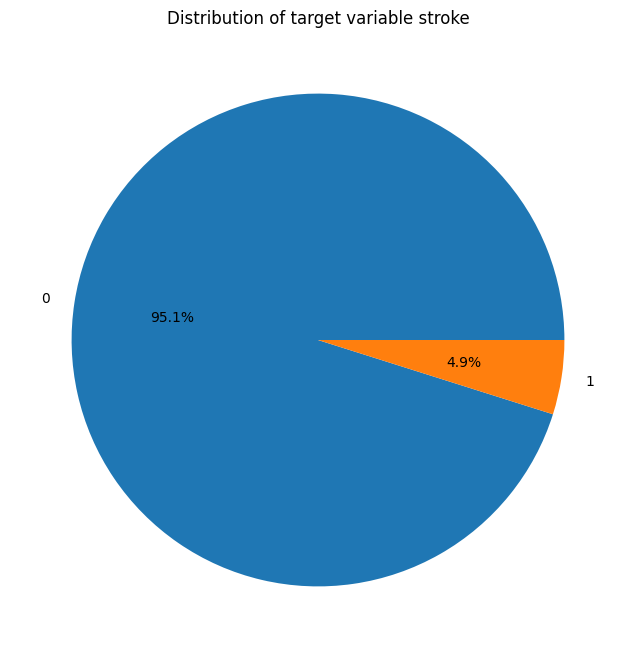

In [ ]:
# ditribution of target variable 'stroke'

plt.figure(figsize=(10,8))
x=df['stroke'].value_counts()
plt.pie(x,labels=x.index,autopct='%1.1f%%') #plotting the pie chart
plt.title("Distribution of target variable stroke")
plt.show()

From the pie plot we can conclude that the chance of occurring a stroke is only 4.9%.The target variable 'stroke' is highly imbalanced.The instances of class 0(no stroke) is high compared to class1(stroke).

###Distribution of categorical variables

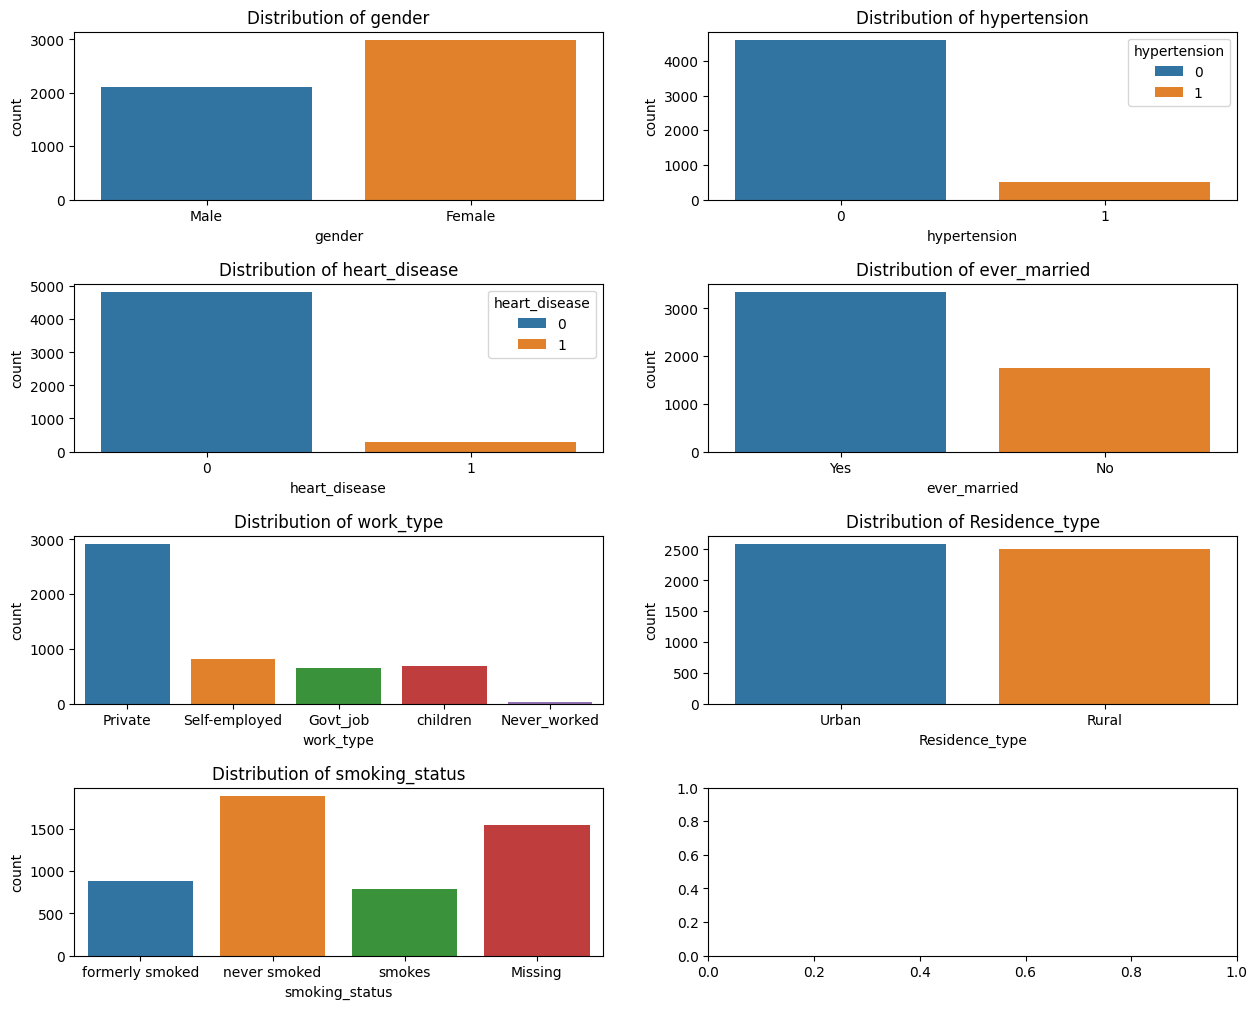

In [ ]:
# distribution of categorical variables

# defining the categorical variables
cat_var=['gender','hypertension',	'heart_disease',	'ever_married',	'work_type',	'Residence_type',	'smoking_status']

# plotting the countplot
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
axes = axs.flatten()
for i,var in enumerate(cat_var):  #iterating the variables
  sns.countplot(x=var,ax=axes[i],data=df,hue=var)
  axes[i].set_title(f'Distribution of {var}')
  plt.subplots_adjust(hspace=0.5) # adjusts the spacing between subplots
plt.show()


*   Majority of the patients are Female.
*   Majority of the patients do not have hypertension.
*   Majority of the patients do not have heart disease.
*   Majority of the patients are married.
*   Majority of the patients work in private sector.
*   The number of patients living in urban and rural area is almost equal.
*   Majority of the patients  have never smoked.

### Distribution of continuous variables

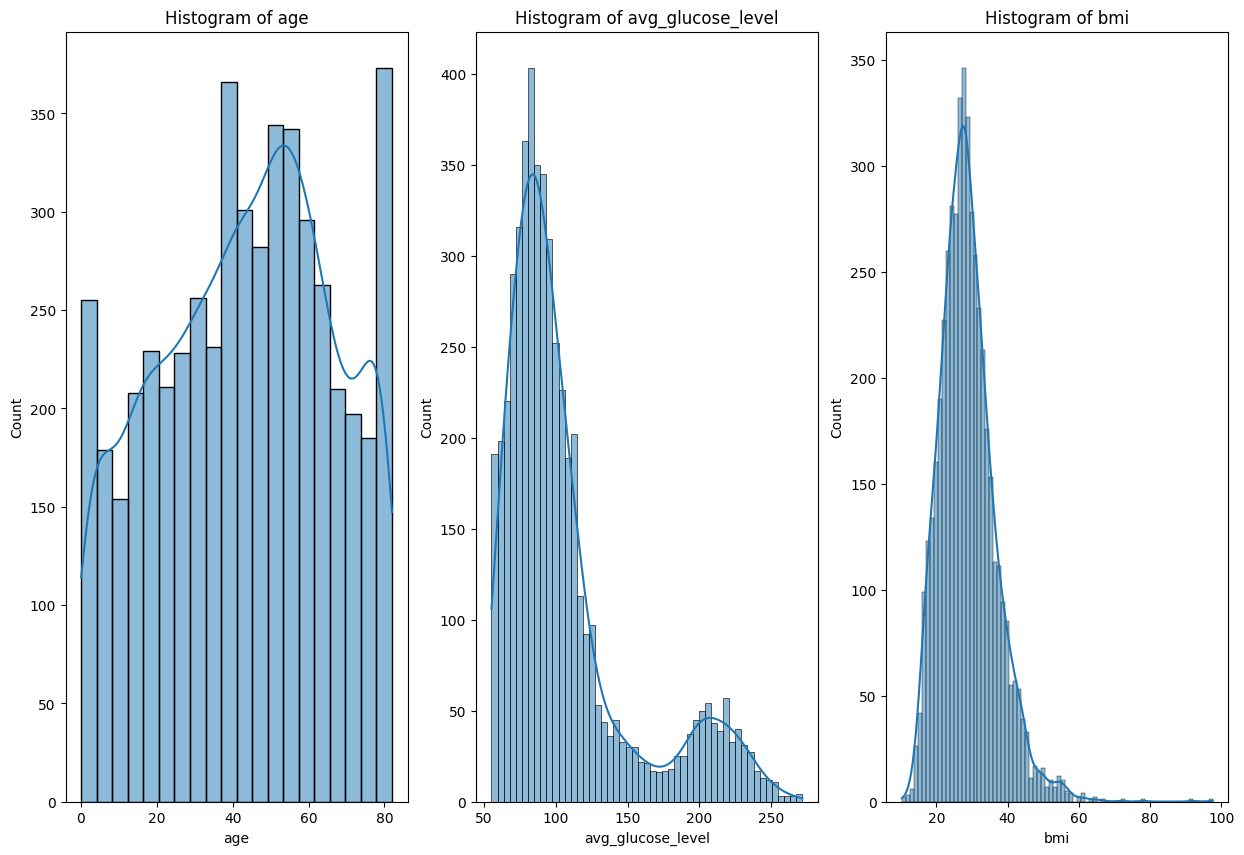

In [ ]:
# distribution of continuous variables

# defining the continuous variables
con_var=['age','avg_glucose_level',	'bmi']

# plotting the histogram
fig, axs = plt.subplots(1 ,3, figsize=(15, 10))

for i,var in enumerate(con_var):
  sns.histplot(data=data,x=var,ax=axs[i],kde=True)
  axs[i].set_title(f'Histogram of {var}')

plt.show()



*   Majority pf the patients are in the age group of 40-80 years.
*   Most patients have an average glucose level in the range of 50-125.
*   The majority of patients have a BMI in the range of 20-40.



###Bivariate Analysis

###Categorical variables against stroke

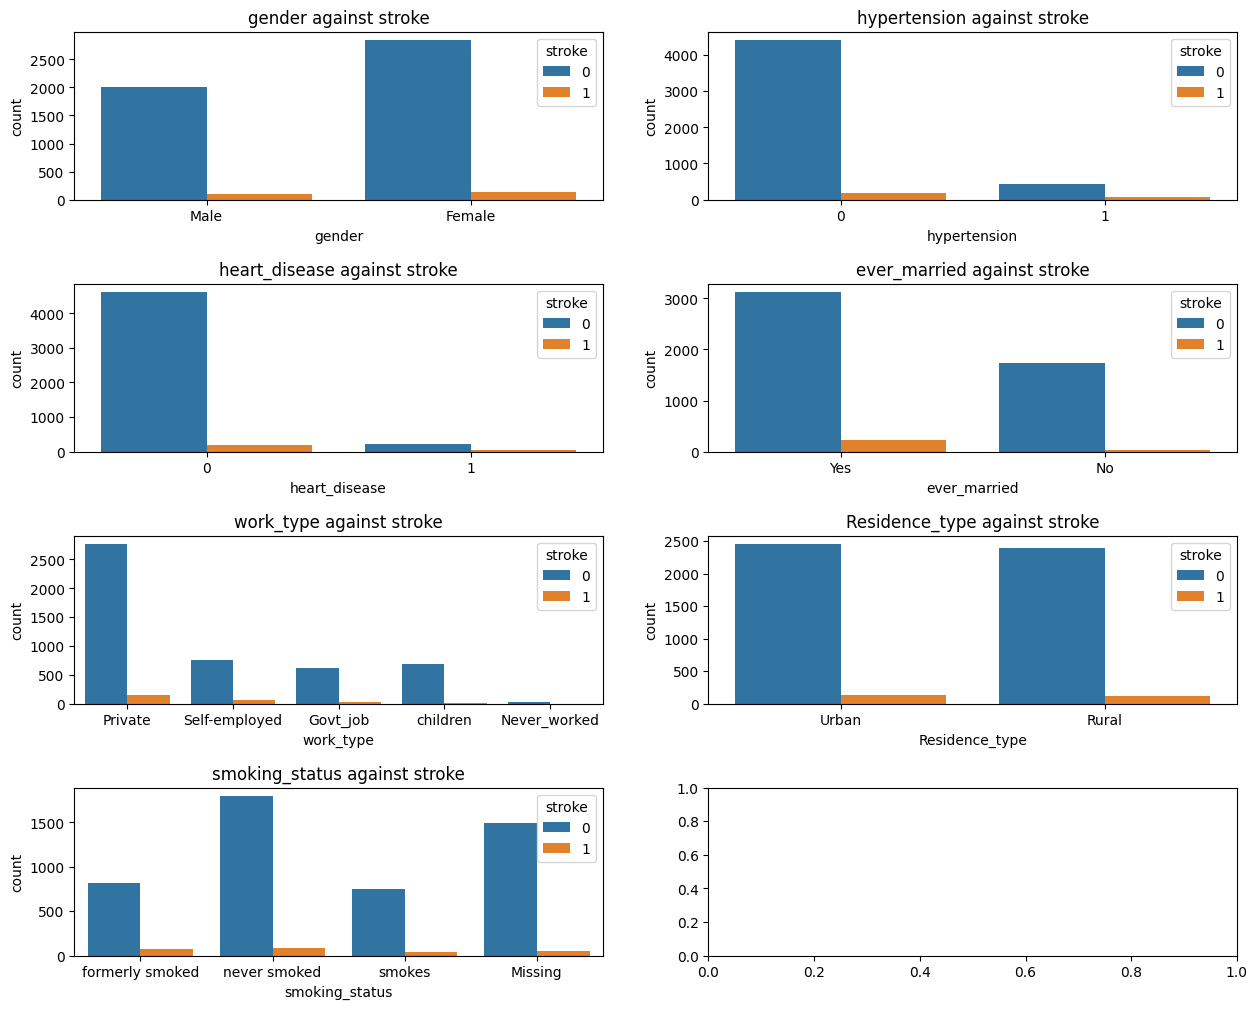

In [ ]:
#Categorical variables against stroke

# defining the categorical variables
cat_var=['gender','hypertension',	'heart_disease',	'ever_married',	'work_type',	'Residence_type',	'smoking_status']

# plotting the graph
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
axes = axs.flatten()
for i,var in enumerate(cat_var):
  sns.countplot(x=df[var],ax=axes[i],hue=df['stroke'])
  axes[i].set_title(f'{var} against stroke')
  plt.subplots_adjust(hspace=0.5)
plt.show()



*   Both males and females have a similar proportion of stroke cases.
*   Patients with hypertension have a higher proportion of stroke cases
     than those without hypertension.
*   Patients with heart disease have a higher proportion of stroke cases.

*   Those who have been married have a higher proportion of stroke cases
     than those who have not.

*   Patients work in private jobs or who are self-employed have a higher  
     proportion of stroke cases compared to other work types.

*   The proportion of stroke cases is almost equal for both urban and
     rural residents.

*  The proportion of stroke cases is higher for patients who formerly

     smoked or currently smoke compared to those who never smoked.

### Continuous variable against target variable stroke

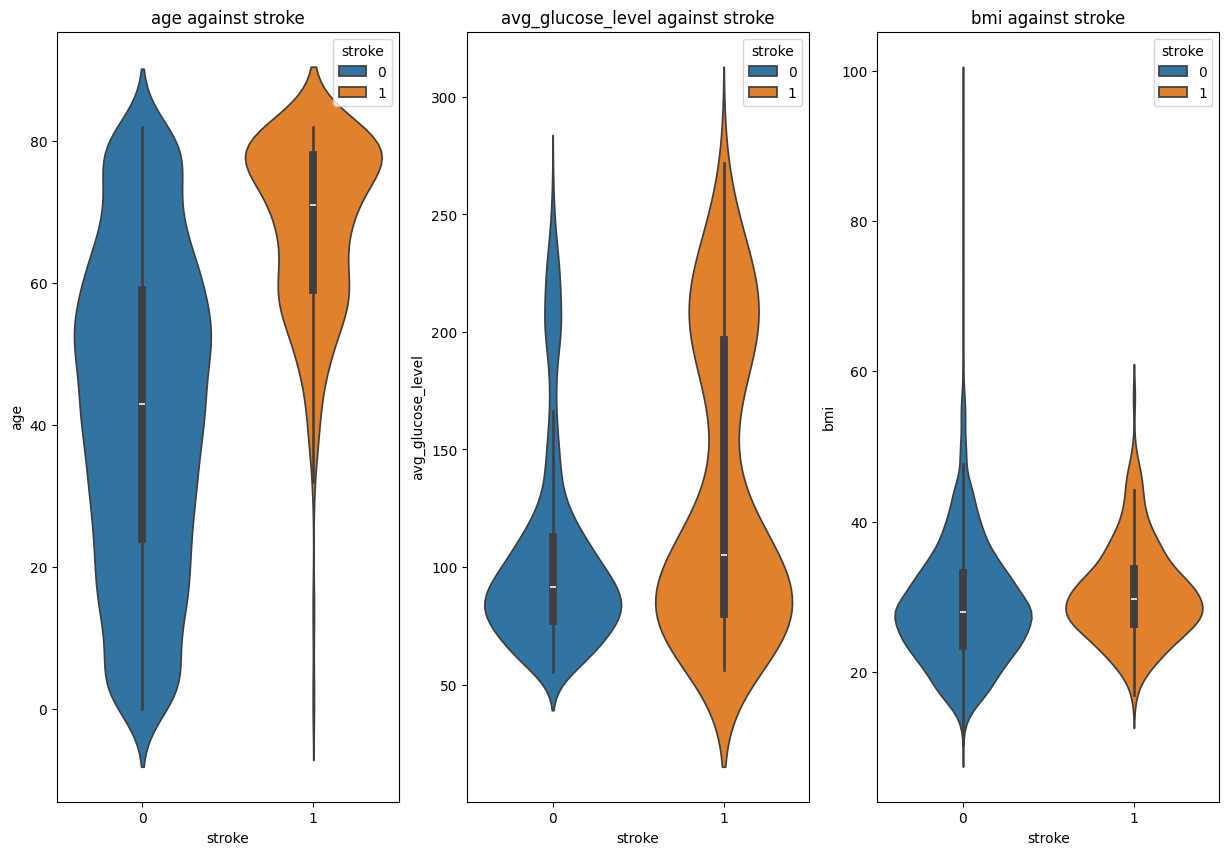

In [ ]:
# Continuous variable against target variable stroke

# defining the continuous variables
con_var=['age','avg_glucose_level',	'bmi']


# plotting the violin graph
fig, axs = plt.subplots(1 ,3, figsize=(15, 10))

for i,var in enumerate(con_var):
  sns.violinplot(x=data['stroke'],y=data[var],ax=axs[i],hue=data['stroke'])
  axs[i].set_title(f'{var} against stroke')

plt.show()



*  Stroke cases are more common in patients who are in the age group of
   50-80.  
*  Stroke patients seem to have a higher average glucose level than    
   non-stroke patients.
*  The BMI distributions for stroke and non-stroke patients are quite
   similar than non-stroke patients.It suggests that BMI might not be a strong predictor for stroke.

###Multivariate Analysis

###Correlation matrix

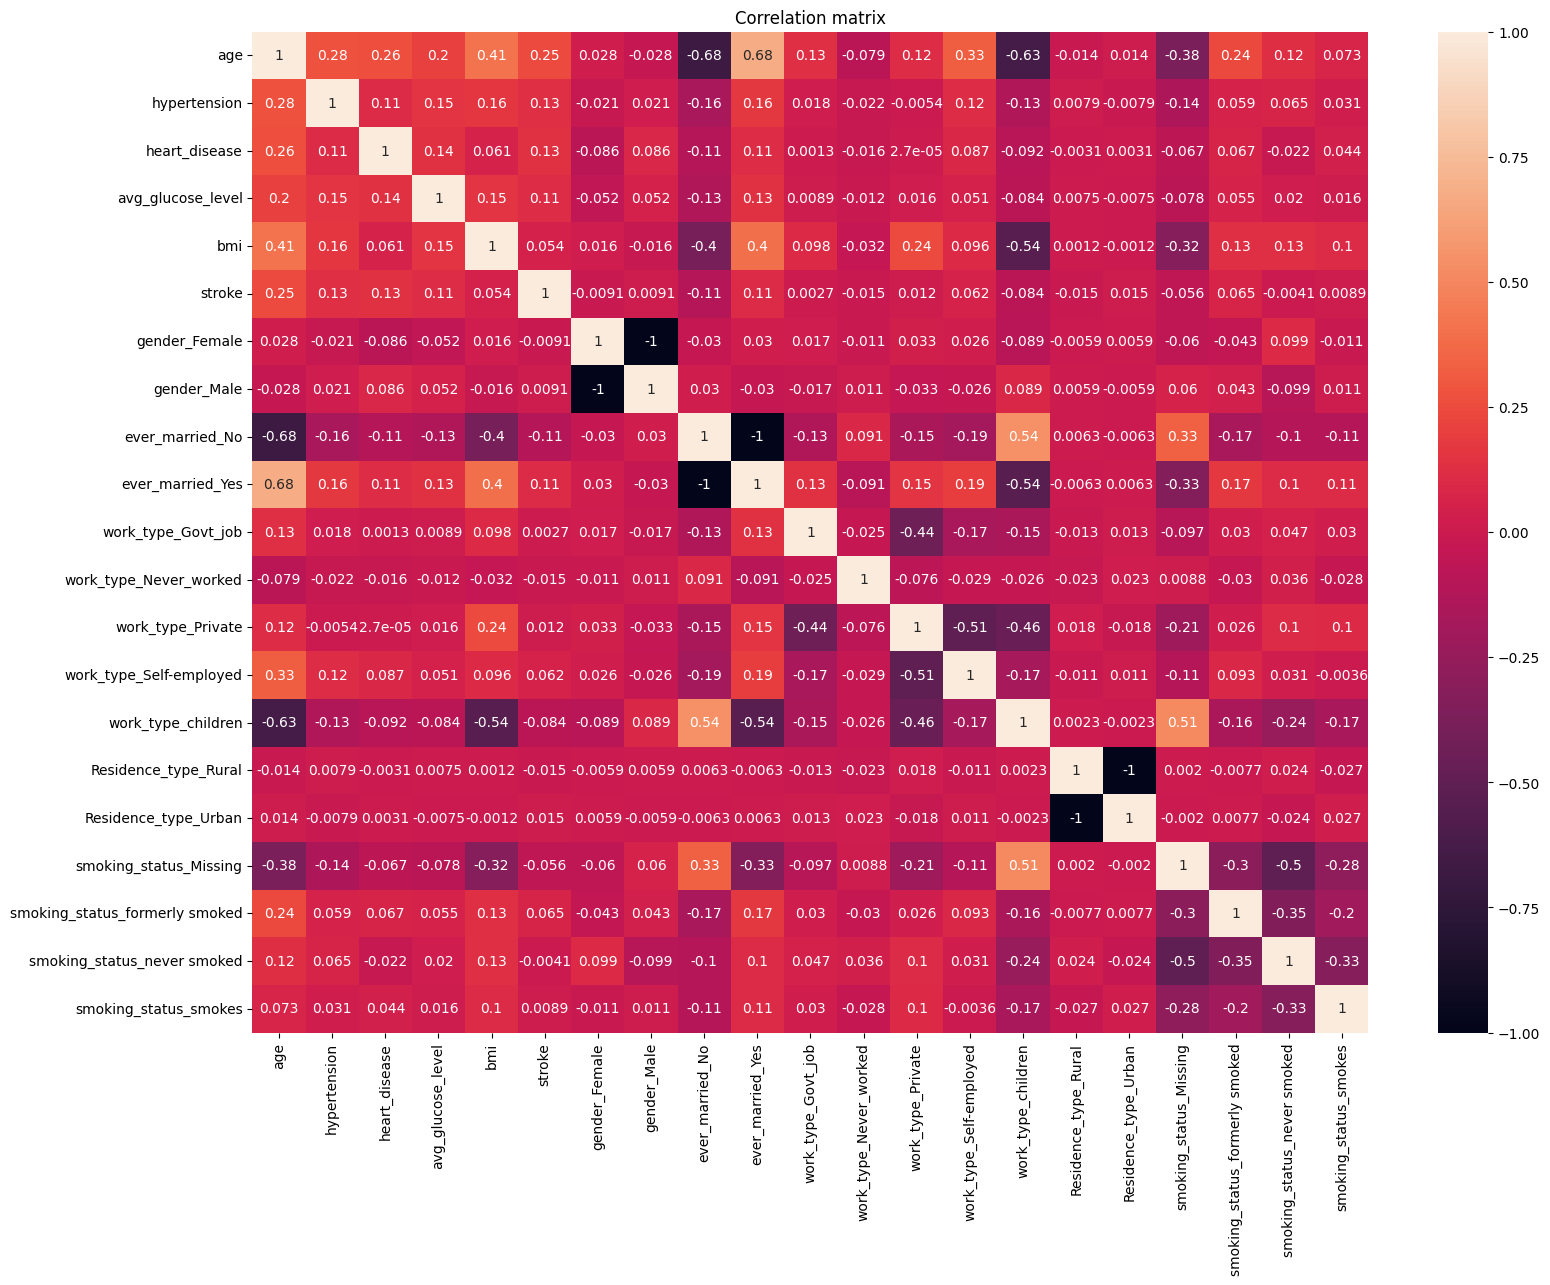

In [ ]:
# plotting the heat map
plt.figure(figsize=(18,13))
sns.heatmap(df_en.corr(),annot=True)
plt.title("Correlation matrix")
plt.show()

 The age feature shows the  positive correlation with  stroke variable.This suggests that older people might be at a higher risk of having a stroke.

 The hypertension and heart_disease features also have positive correlations with stroke, indicating that people with hypertension or heart disease could be more likely to have a stroke.

 avg_glucose_level and  ever_married_Yes also show positive correlations, suggesting that higher average glucose levels and being married might be associated with a higher likelihood of a stroke.

 The work_type_Self-employed and  gender_Male features show positive correlations, indicating that self-employed individuals and males might be more likely to have a stroke.

On the other hand, features such as work_type_children and Residence_type_Rural show negative correlations with stroke, suggesting that these factors might be associated with a lower likelihood of having a stroke.

# **5. Model Selection, Training & Evaluation**

Now, we have to find the best model for binary classification of the dataset to predict whether the person is having a stroke or not.

The starting dataset is usually divided into training dataset and the test dataset.

We will use the ratio (80/20) for the split. The classification techniques we choose to implement are the following:
Logistic Regression,KNeighborsClassifier, DecisionTreeClassifier,RandomForest Classifier,Support Vector classifier,Gradient Boosting Classifier  and XGBoost.


###Normalizing the data

In [ ]:
# normalizing the data using standard Scaler
sc=StandardScaler()
sc.fit_transform(df_en)
df_en.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Missing,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1.692375,1.280947,1,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0,0,1.669461,1.204703,1,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0,1,1.539591,1.247389,1,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0,0,1.637638,1.263578,1,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1,0,1.640887,1.156269,1,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


As the bmi, stroke and avg_glucose_level columns are slightly skewed,we have to normalize the data.

In [ ]:
# define the features and target variable
x=df_en.drop('stroke',axis=1)  #features
y=df_en['stroke']          #target variable

In [ ]:
# #of rows and columns in the features and target variable
x.shape,y.shape

((5110, 20), (5110,))

In [ ]:
# checking the target variable whether class imbalanced or not
df_en['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

The target variable is highly class imbalanced.In order to avoid the this problem we can use SMOTE technique.

In [ ]:
# using SMOTE to avoid class imbalance problem
sm = SMOTE()

# splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [ ]:
# checking the number of class 0 and class 1 before applying SMOTE
sum(y_train == 1),sum(y_train == 0)

(204, 3884)

In [ ]:
# checking the number of class 0 and class 1 after applying SMOTE
sum(y_train_smote == 1) ,sum(y_train_smote == 0)

(3878, 3878)

###Model selection

In [ ]:
# defining the models

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "DecisionTree": DecisionTreeClassifier(),
          "RandomForest Classifier": RandomForestClassifier(),
          "SVC": SVC(),
          "Gradient Boosting Classifier": GradientBoostingClassifier(),
          "XGBoost": XGBClassifier(),
        }


# iterating through the models
for name,model in models.items():

  model.fit(X_train_smote,y_train_smote)   #fitting the model

  y_test_pred=model.predict(X_test)     #predicting the model

  # printing the confusion matrix and classification report
  print(f'*********{name}*********\nConfusion Matrix: \n{confusion_matrix(y_test, y_test_pred)}\n{classification_report(y_test, y_test_pred)}\n')

  # printing the accuracy
  print("Accuracy: ",accuracy_score(y_test, y_test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*********Logistic Regression*********
Confusion Matrix: 
[[715 254]
 [ 18  35]]
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       969
           1       0.12      0.66      0.20        53

    accuracy                           0.73      1022
   macro avg       0.55      0.70      0.52      1022
weighted avg       0.93      0.73      0.81      1022


Accuracy:  0.7338551859099804
*********KNN*********
Confusion Matrix: 
[[807 162]
 [ 34  19]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       969
           1       0.10      0.36      0.16        53

    accuracy                           0.81      1022
   macro avg       0.53      0.60      0.53      1022
weighted avg       0.92      0.81      0.85      1022


Accuracy:  0.8082191780821918
*********DecisionTree*********
Confusion Matrix: 
[[920  49]
 [ 44   9]]
              precision    recall  f1-score   support

           0

Based on the F1-score for class 1 (indicating the presence of stroke), the XG Boost and Gradient Boosting Classifier have high F1-score and accuracy among the models, which means these have the best balance between precision and recall for predicting the presence of stroke.

So we can tune the hyperparameters for these two models.

###Hyperparameter tuning

In [ ]:
# parameter tuning for GradientBoostingClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.1,0.20],
    'max_depth': [ 4, 5],
    'min_samples_split': [ 3, 4],
    'min_samples_leaf': [ 2, 3],
    'subsample': [0.7,0.8, 0.9]
}


# Instantiate the model
gb_clf = GradientBoostingClassifier()
# Define the scoring function
scoring = make_scorer(roc_auc_score)
# Grid search
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=3, scoring=scoring, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_smote,y_train_smote)

# printing the best estimator from the grid search
grid_search.best_estimator_

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_leaf=2,
                           min_samples_split=4, subsample=0.9)

learning_rate: The learning rate shrinks the contribution of each tree.

max_depth: The maximum depth of the individual regression estimators.

min_samples_leaf: The minimum number of samples required to be at a leaf node.

min_samples_split: The minimum number of samples required to split an internal node.

n_estimators: The number of boosting stages to be performed.

subsample: The fraction of samples to be used for fitting the individual base learners.

In [ ]:
# # Instantiating the model with the best estimator parameters
gb_clf=GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_leaf=2,
                           min_samples_split=4, subsample=0.9)
# fitting the model
gb_clf.fit(X_train_smote,y_train_smote)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_leaf=2,
                           min_samples_split=4, subsample=0.9)

In [ ]:
# make pfredictions on the test set
ypred=gb_clf.predict(X_test)

In [ ]:
# printing the confusion matrix
cm = confusion_matrix(y_test, ypred, labels=gb_clf.classes_)

# finding the accuracy
score=accuracy_score(y_test, ypred)
print("Confusion matrix:",cm)
print("Accuracy:",score)

Confusion matrix: [[933  36]
 [ 46   7]]
Accuracy: 0.9197651663405088


In [ ]:
# printing the classification report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       969
           1       0.16      0.13      0.15        53

    accuracy                           0.92      1022
   macro avg       0.56      0.55      0.55      1022
weighted avg       0.91      0.92      0.92      1022



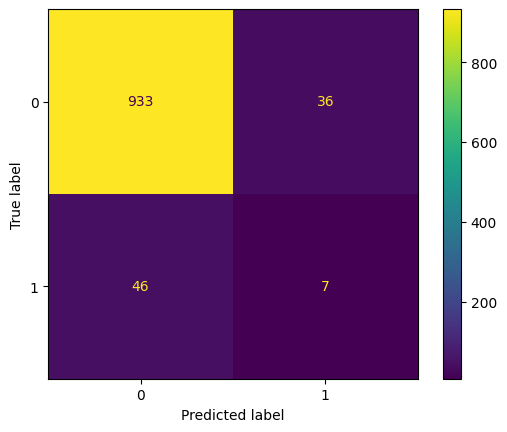


Confusion Matrix: 
[[933  36]
 [ 46   7]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       969
           1       0.16      0.13      0.15        53

    accuracy                           0.92      1022
   macro avg       0.56      0.55      0.55      1022
weighted avg       0.91      0.92      0.92      1022




In [ ]:
# visualizing the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_clf.classes_)
disp.plot()
plt.show()
print(f'\nConfusion Matrix: \n{confusion_matrix(y_test, ypred)}\n{classification_report(y_test, ypred)}\n')


There are 933 true negatives, which means the model correctly predicted that 933 patients would not have a stroke.


There are 36 false positives, meaning the model predicted that 36 patients would have a stroke when they actually did not.

 There are 46 false negatives, which means the model predicted that 46 patients would not have a stroke when they actually did.

 There are 7 true positives, which means the model correctly predicted that 7 patients would have a stroke.

The goal should be to minimize false negatives as much as possible to avoid under-predicting the 'Stroke' class, while also reducing false positives to avoid over-predicting the 'Stroke' class.

F1 score for class 0 is 0.96  and for class 1 is 0.15 which is fair. Also accuracy is 92%.

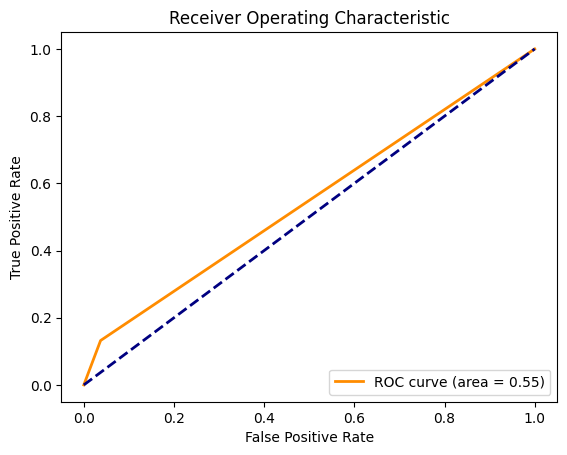

In [ ]:
# visualizing the roc curve
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, ypred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

# Plot ROC curve
plt.figure()
plt.plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The Receiver Operating Characteristic (ROC) curve is a plot that shows the trade-off between the true positive rate (TPR) and false positive rate (FPR) for every possible classification threshold.

The Area Under the Curve (AUC value) is 0.51. The AUC value is an aggregate measure of the model's performance across all classification thresholds. An AUC of 0.5 suggests no discrimination (i.e., ability to distinguish the classes), 1 indicates perfect discrimination, and 0 implies perfect discrimination but in the opposite direction. Hence, an AUC of 0.55 indicates the classifier cannot distinguish between the positive and negative classes.

###Hyperparameter tuning for XGBclassifier

In [ ]:
# Define the hyperparameter grid
param_grid = {
   'max_depth': [5, 7],
   'learning_rate': [0.01, 0.1],
   'n_estimators': [100, 200],
   'gamma': [ 0.1, 0.2],
   'min_child_weight': [ 5, 10],
   'subsample': [0.5, 1.0],
   'colsample_bytree': [ 0.7, 1.0]
}



# Instantiate the model
xg_clf = XGBClassifier()
# Define the scoring function
scoring = make_scorer(roc_auc_score)

# Perform hyperparameter grid search
grid_search = GridSearchCV(estimator=xg_clf, param_grid=param_grid, scoring=scoring, cv=3, verbose=2)
grid_search.fit(X_train_smote,y_train_smote)

# printing the best estimator from the grid search
grid_search.best_estimator_


Fitting 3 folds for each of 128 candidates, totalling 384 fits
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Define the model with the optimal hyperparameters
xg_clf = XGBClassifier(
    colsample_bytree=0.7,
    gamma=0.2,
    learning_rate=0.01,
    max_depth=7,
    min_child_weight=5,
    n_estimators=100,
    subsample=0.5,
    scale_pos_weight=1,     # adjust class weights due to class imbalance
    eval_metric='logloss',   # use logloss to evaluate performance
     )

# fitting the model
xg_clf.fit(X_train_smote, y_train_smote)

# Make predictions on the test set

y_pred=xg_clf.predict(X_test)

In [ ]:
# printing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=xg_clf.classes_)

# finding the accuracy
score=accuracy_score(y_test, y_pred)
print("Confusion matrix:",cm)
print("Accuracy:",score)

Confusion matrix: [[878  91]
 [ 34  19]]
Accuracy: 0.8776908023483366


In [ ]:
# printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       969
           1       0.17      0.36      0.23        53

    accuracy                           0.88      1022
   macro avg       0.57      0.63      0.58      1022
weighted avg       0.92      0.88      0.90      1022



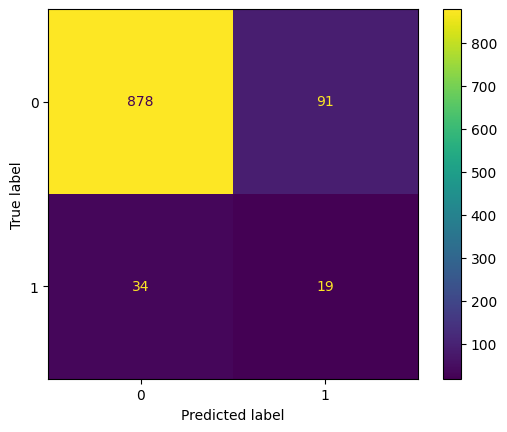


Confusion Matrix: 
[[878  91]
 [ 34  19]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       969
           1       0.17      0.36      0.23        53

    accuracy                           0.88      1022
   macro avg       0.57      0.63      0.58      1022
weighted avg       0.92      0.88      0.90      1022




In [ ]:
# visualizing the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xg_clf.classes_)
disp.plot()
plt.show()
print(f'\nConfusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n{classification_report(y_test, y_pred)}\n')

There are 878 true negatives, which means the model correctly predicted that 878 patients would not have a stroke.


There are 91 false positives, meaning the model predicted that 91 patients would have a stroke when they actually did not.

 There are 34 false negatives, which means the model predicted that 34 patients would not have a stroke when they actually did.

 There are 19 true positives, which means the model correctly predicted that 19 patients would have a stroke.

The goal should be to minimize false negatives as much as possible to avoid under-predicting the 'Stroke' class, while also reducing false positives to avoid over-predicting the 'Stroke' class.

F1 score for class 0 is 0.93  and for class 1 is 0.23 which is better than the GradientBoosting Classifier. Also accuracy is 88%.

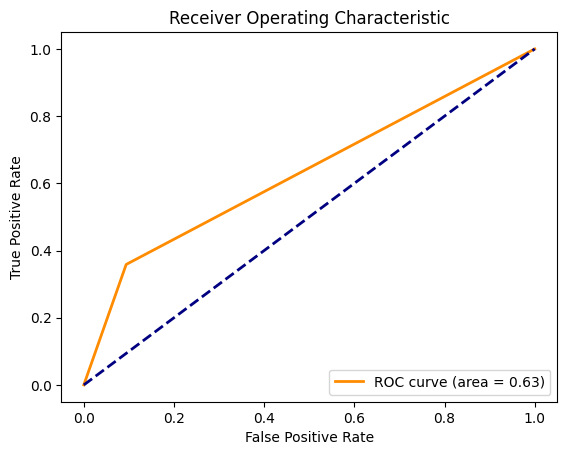

In [ ]:
# visualizing the roc curve
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_pred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

# Plot ROC curve
plt.figure()
plt.plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

With an AUC of 0.63, the model has a fair discrimination capacity.  This suggests that the model has a reasonable ability to distinguish between patients who will have a stroke and those who will not.

#  Conclusion

1. We decided to predict whether a patient  will have stroke or not.

2. Before developing the models we did data preprocessing to ensure the validity of the assumptions of applicability of the models and ensure the best performances. In preprocessing phase, we applied  one hot encoding to the categorical columns and then we performed the scaling of the columns with StandardScaler.Also we noticed the presence of some outliers and handled by applying log transformation.

3. In order to avoid the class imbalance problem in the target variable,we applied the SMOTE technique. Then trained the model by splitting the data into training and testing.

4. From the chosen models,the XGBoost and Gradient Boosting Classifier are  the best models and  SVC is the worst model.By tuning the hyperparameters for the Gradient Boosting Classifier, the  accuracy score increased from 91 to 92%.But the AUC is 0.55 which implies the model cannot distinguish between the positive and negative classes.
When tuning the XGBoost we got the AUC of 0.63.This implies that
the model has a fair discrimination capacity. This suggests that the model has a reasonable ability to distinguish between patients who will have a stroke and those who will not.